STUDENT DEPRESSION ANALYSIS
---------------------------------------------------------

Name:Aiswarya Reghuraj Nair
----

Organization:Entri Elevate
---

Date:
----


-------------------

1.Overview of Problem Statement:
----------

2.Objective
-----

3.Data Description
------

Import Libraries
---

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectFromModel
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

4.Data Collection
----

Load the dataset
---

In [2]:
data=pd.read_csv("Student Depression Dataset.csv")

In [3]:
data.shape

(27901, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [5]:
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [6]:
data.head(5)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [7]:
#The code data.describe(include='object') is used to generate descriptive statistics of the columns in a DataFrame 
#that have a data type of 'object' (typically categorical variables like strings or dates).
data.describe(include='object')

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
count,27901,27901,27901,27901,27901,27901,27901,27901
unique,2,52,14,5,4,28,2,2
top,Male,Kalyan,Student,Less than 5 hours,Unhealthy,Class 12,Yes,No
freq,15547,1570,27870,8310,10317,6080,17656,14398


 5.Data Preprocessing- Data Cleaning
 -----

In [8]:
data.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [9]:
imputer = SimpleImputer(strategy='median')
data['Financial Stress'] = imputer.fit_transform(data[['Financial Stress']])

In [10]:
data.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [11]:
#Drop ID column
data.drop(['id'],inplace=True,axis=1)

In [12]:
data.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [13]:
numerical_columns = data.select_dtypes(include=['number'])

In [14]:
numerical_columns.shape

(27901, 9)

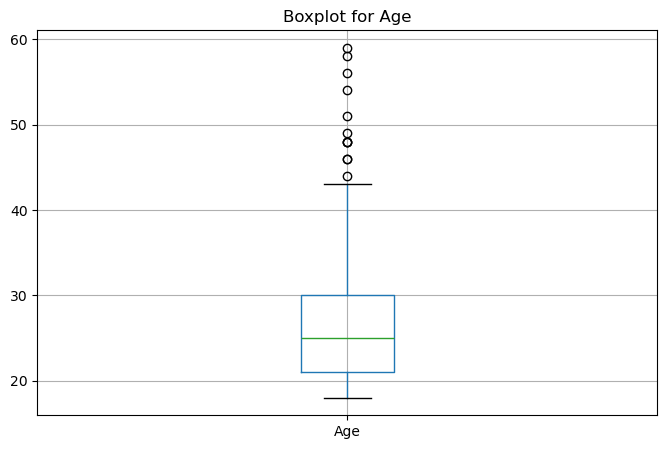

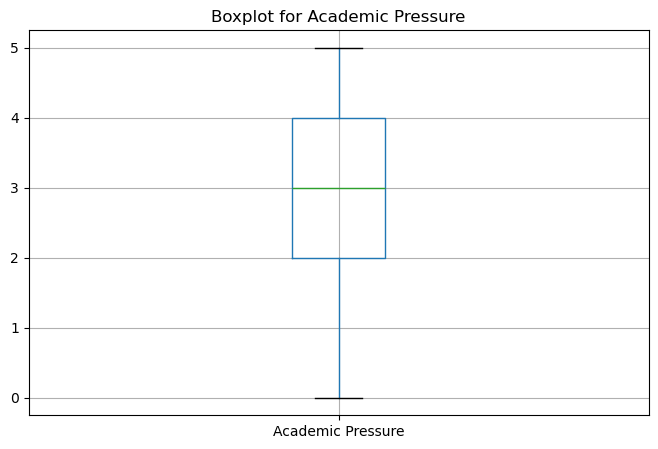

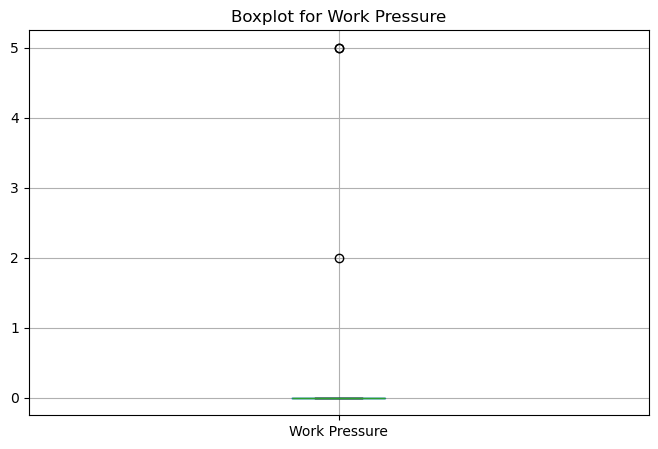

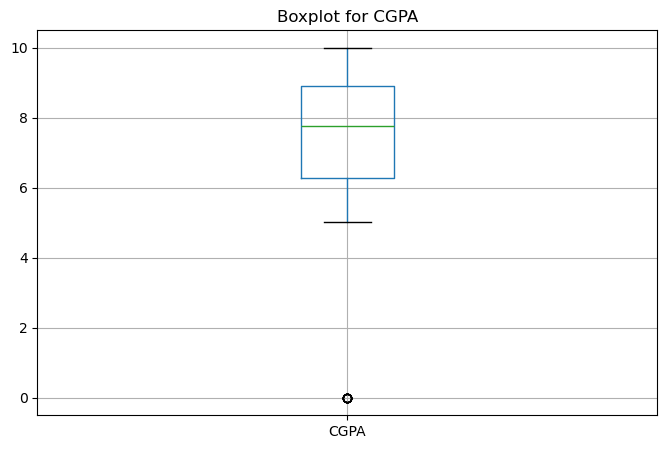

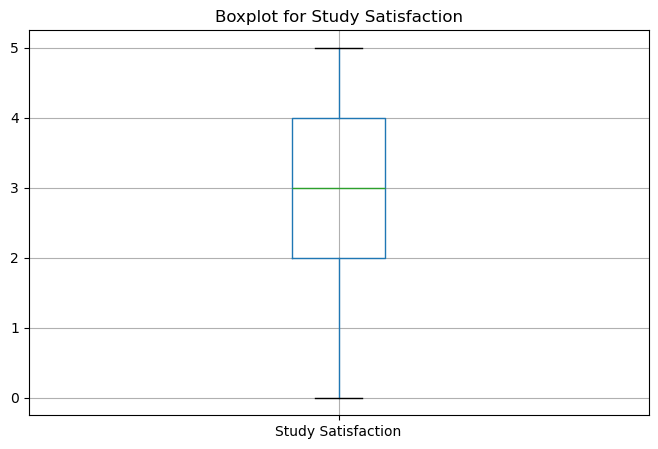

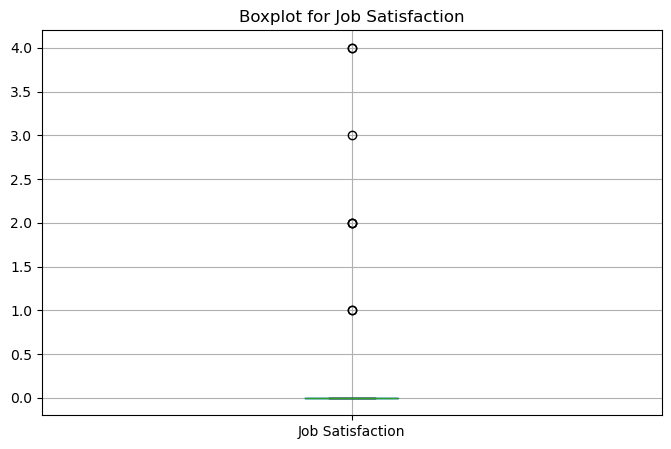

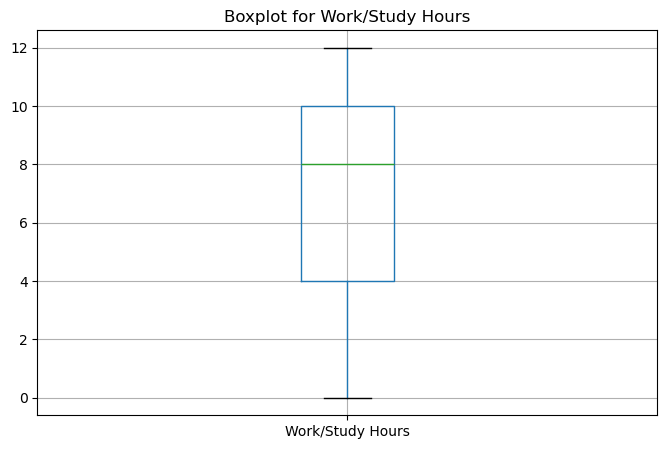

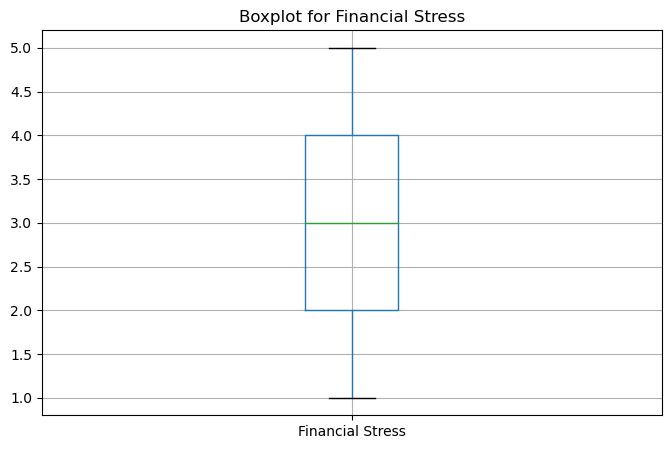

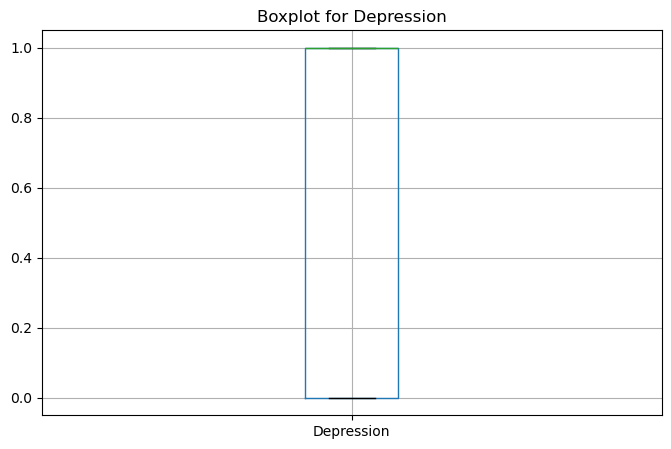

In [15]:
#Boxplot for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8,5))
    numerical_columns.boxplot(column=column)
    plt.title(f"Boxplot for {column}")

In [16]:
numerical_columns1 = data.select_dtypes(include=['number']).columns

In [17]:
numerical_columns1

Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress', 'Depression'],
      dtype='object')

In [18]:
# Calculate Z-scores to identify outliers
z_scores = np.abs(zscore(data[numerical_columns1]))
outlier_threshold = 3  # Common threshold for outlier detection
outlier_indices = np.where(z_scores > outlier_threshold)

In [19]:
# Drop rows with outliers
data_cleaned = data[(z_scores < outlier_threshold).all(axis=1)]
print("Cleaned Data:")
print(data_cleaned)

Cleaned Data:
       Gender   Age           City Profession  Academic Pressure  \
0        Male  33.0  Visakhapatnam    Student                5.0   
1      Female  24.0      Bangalore    Student                2.0   
2        Male  31.0       Srinagar    Student                3.0   
3      Female  28.0       Varanasi    Student                3.0   
4      Female  25.0         Jaipur    Student                4.0   
...       ...   ...            ...        ...                ...   
27896  Female  27.0          Surat    Student                5.0   
27897    Male  27.0       Ludhiana    Student                2.0   
27898    Male  31.0      Faridabad    Student                3.0   
27899  Female  18.0       Ludhiana    Student                5.0   
27900    Male  27.0          Patna    Student                4.0   

       Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0                0.0  8.97                 2.0               0.0   
1                0.0  5.90       

In [20]:
data_cleaned.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [21]:
# Address Skewness
# Log transform skewed numerical features (excluding 'Depression', which is binary)
skewed_columns = ['Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 
                  'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']

In [22]:
data_cleaned[skewed_columns] = np.log1p(data_cleaned[skewed_columns])

In [23]:
data_cleaned.shape, data_cleaned.isnull().sum()

((27871, 17),
 Gender                                   0
 Age                                      0
 City                                     0
 Profession                               0
 Academic Pressure                        0
 Work Pressure                            0
 CGPA                                     0
 Study Satisfaction                       0
 Job Satisfaction                         0
 Sleep Duration                           0
 Dietary Habits                           0
 Degree                                   0
 Have you ever had suicidal thoughts ?    0
 Work/Study Hours                         0
 Financial Stress                         0
 Family History of Mental Illness         0
 Depression                               0
 dtype: int64)

In [24]:
#Original dataset had 27,901 rows; after outlier removal, it has 27871 rows.

 6.Exploratory Data Analysis (EDA)
 ----

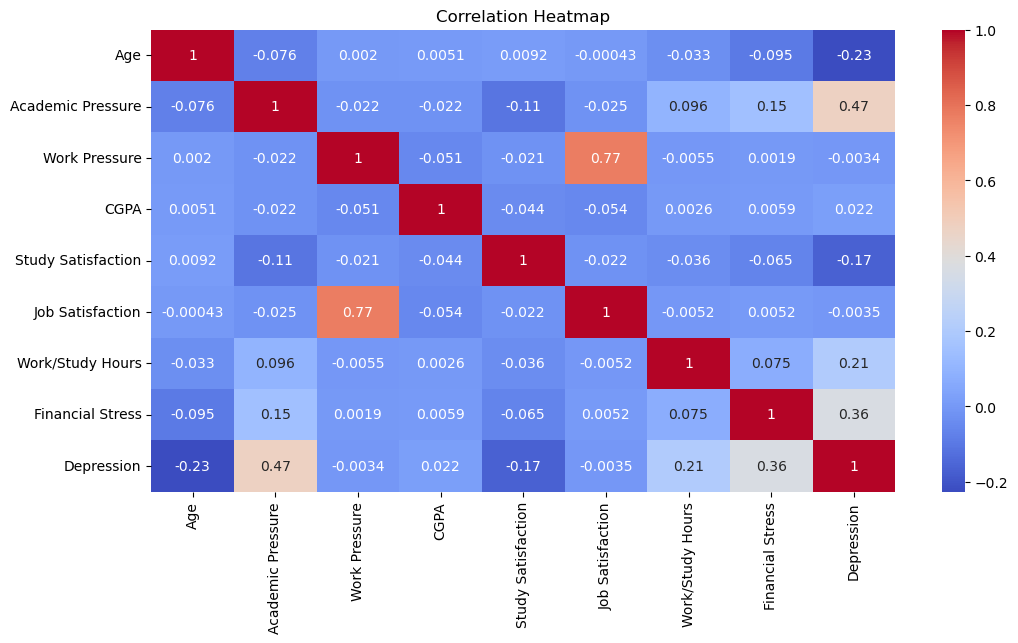

In [25]:
# Visualize correlation
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_columns.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

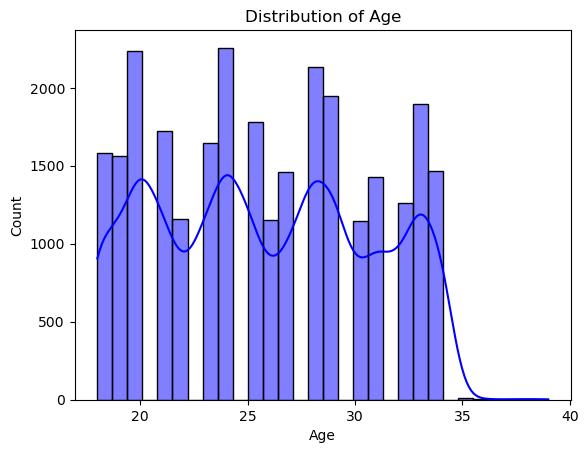

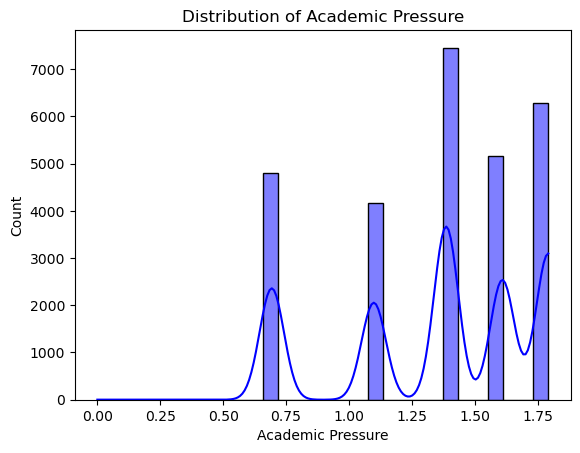

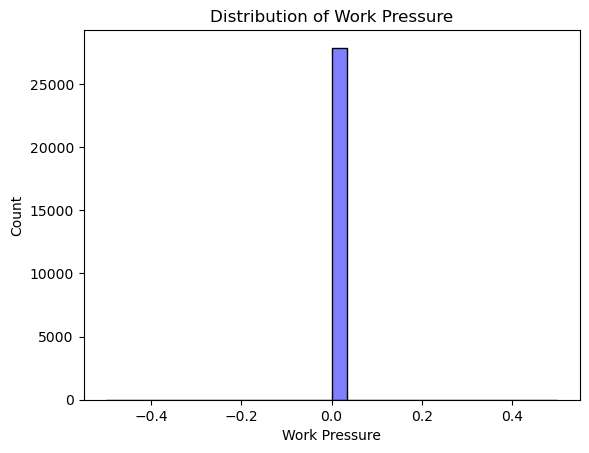

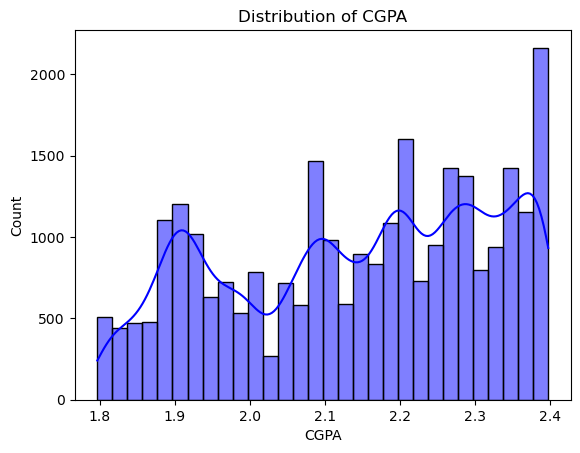

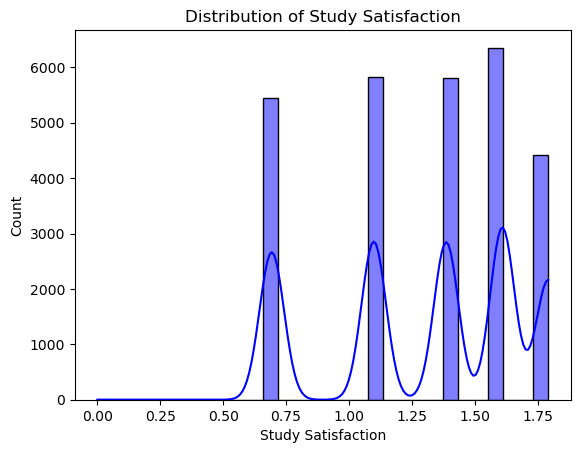

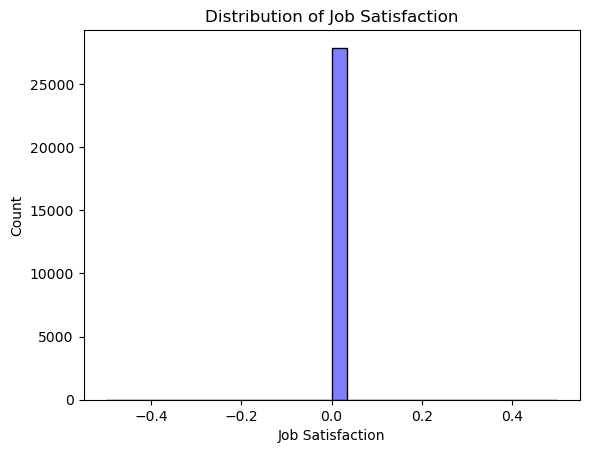

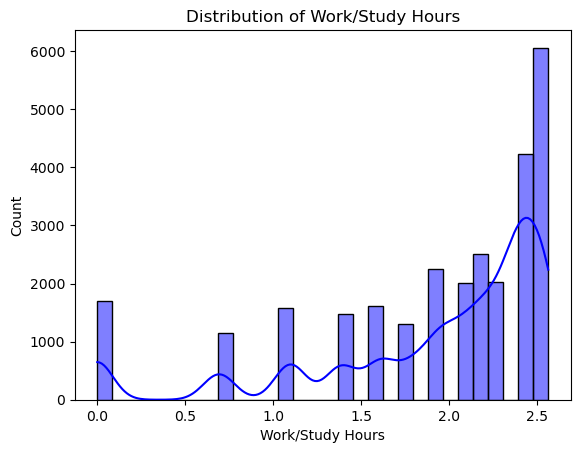

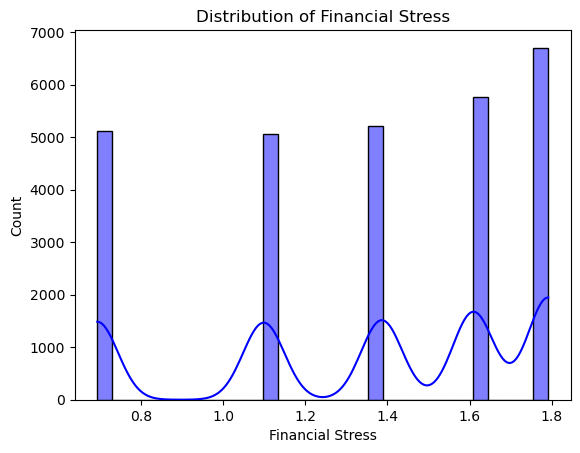

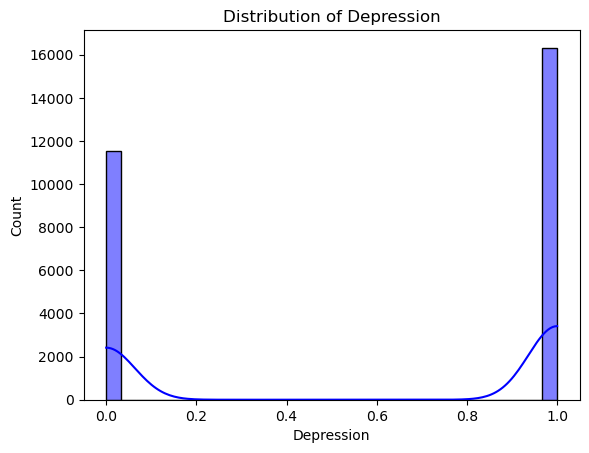

In [26]:
# Plot each numerical column
for column in numerical_columns:
    plt.figure()
    sns.histplot(data_cleaned[column], kde=True,bins=30, color='blue')
    plt.title(f"Distribution of {column}")
    plt.show()

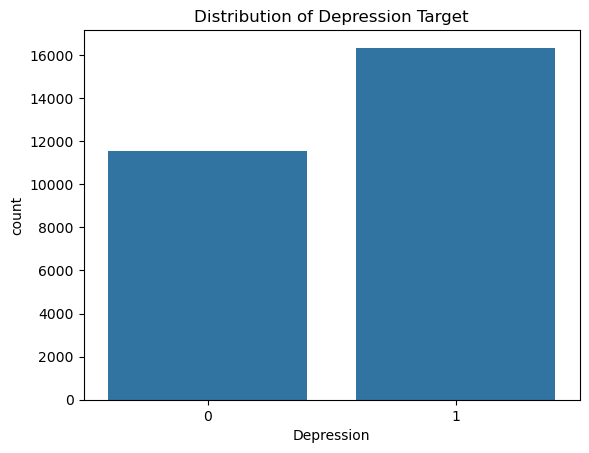

In [27]:
# Distribution of the target variable
sns.countplot(x='Depression', data=data)
plt.title('Distribution of Depression Target')
plt.show()

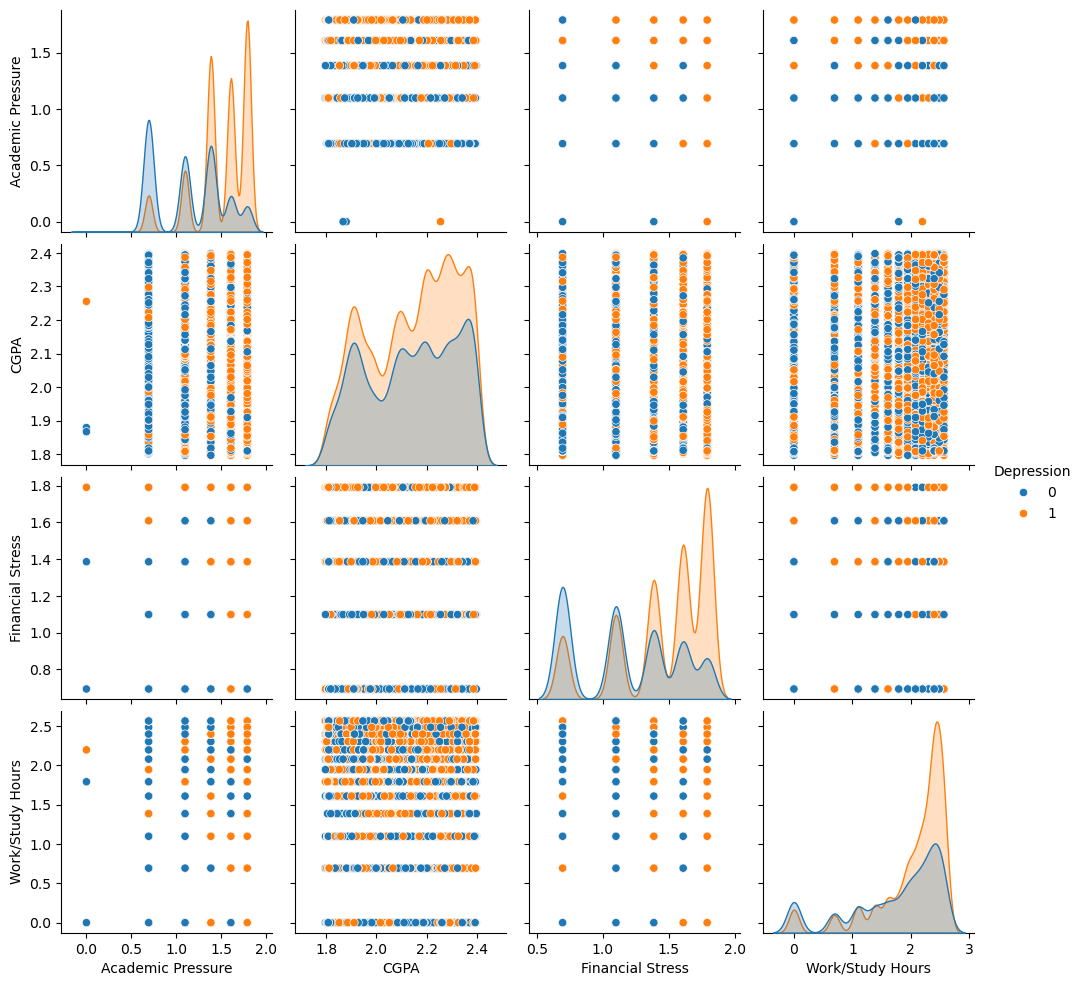

In [28]:
# Pairplot for selected features
sns.pairplot(data_cleaned, vars=['Academic Pressure', 'CGPA', 'Financial Stress', 'Work/Study Hours'], 
             hue='Depression')
#add color to the plots based  on the 'Depression' column.

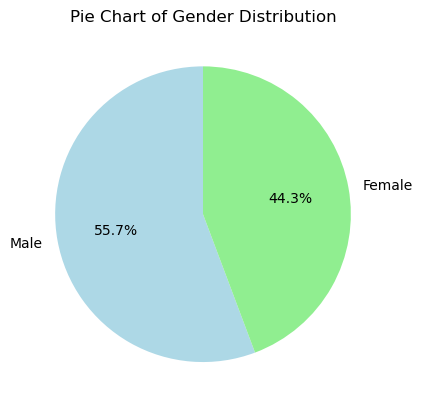

In [29]:
#Pie Diagram for a categorical column
if 'Gender' in data.columns:
    plt.figure()
    data_cleaned['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=90)
    plt.title('Pie Chart of Gender Distribution')
    plt.ylabel('')
    plt.show()

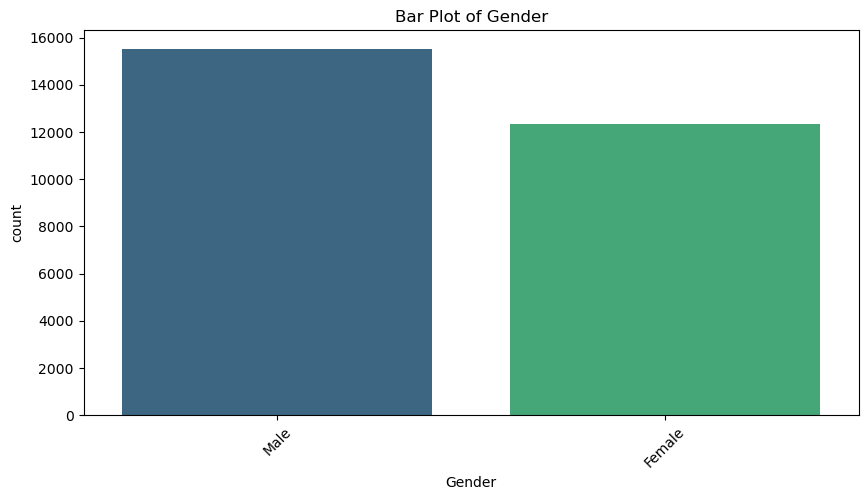

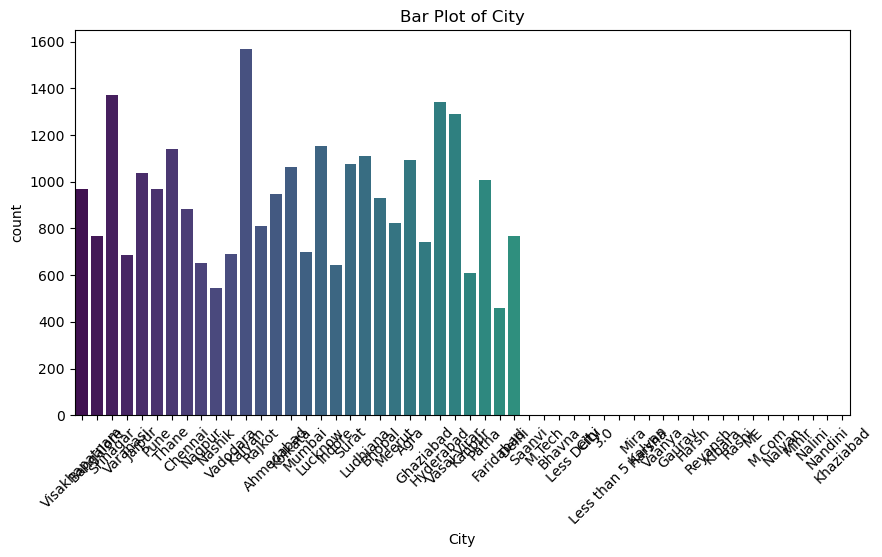

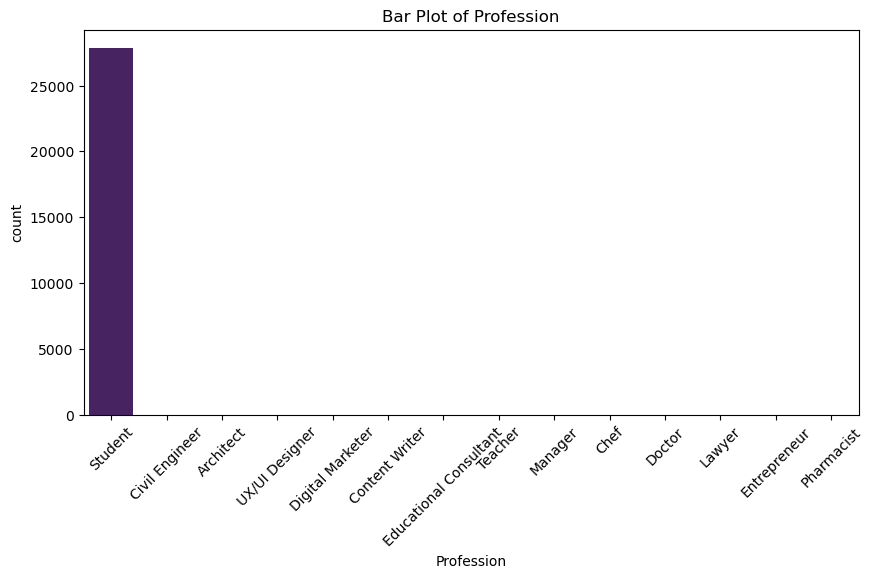

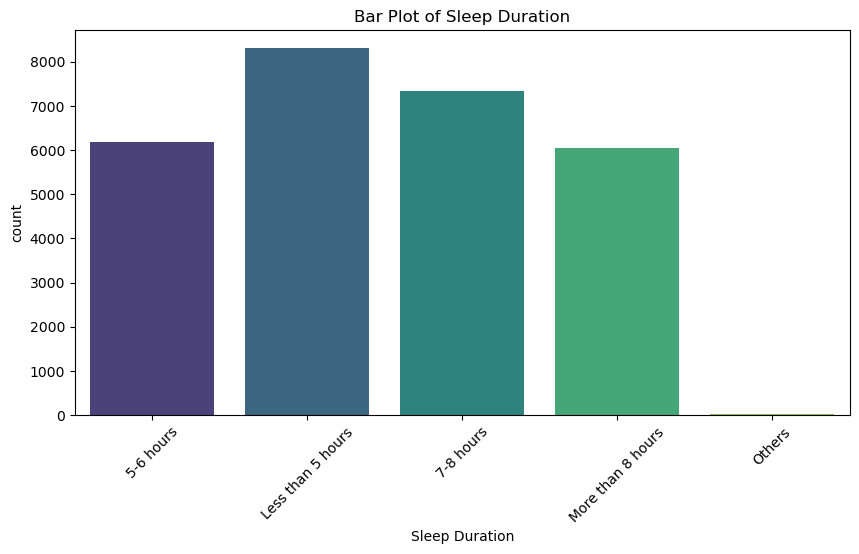

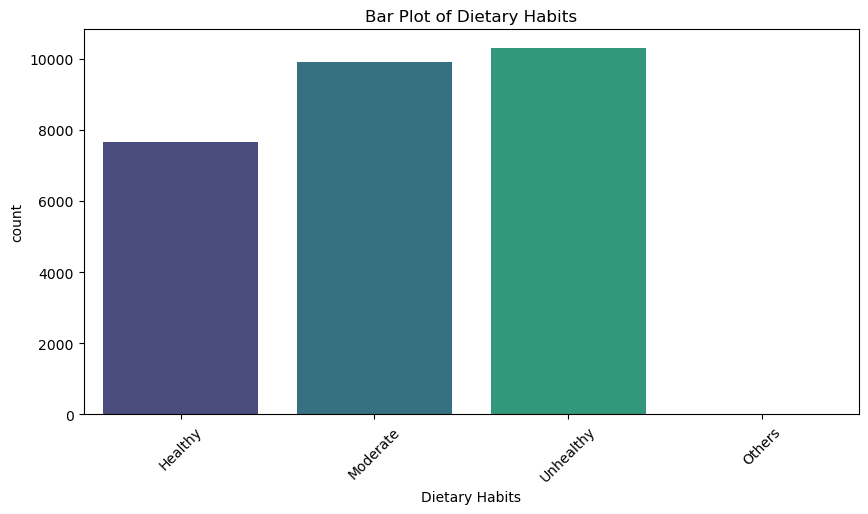

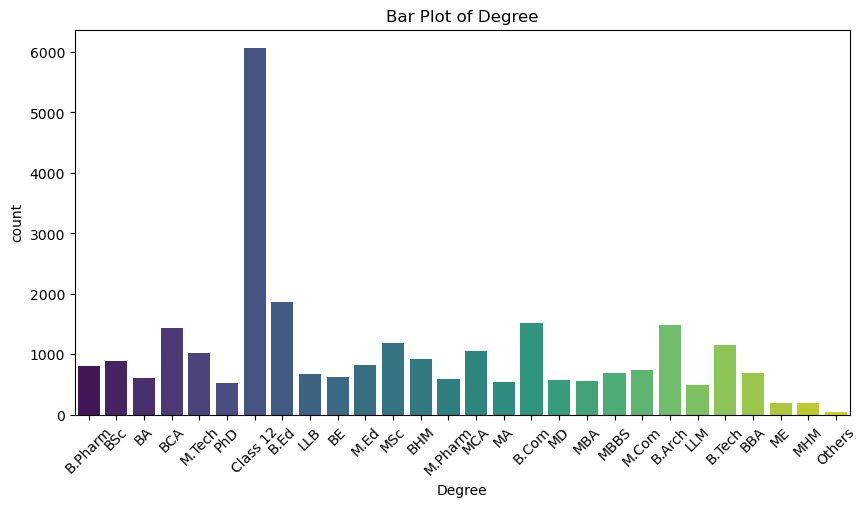

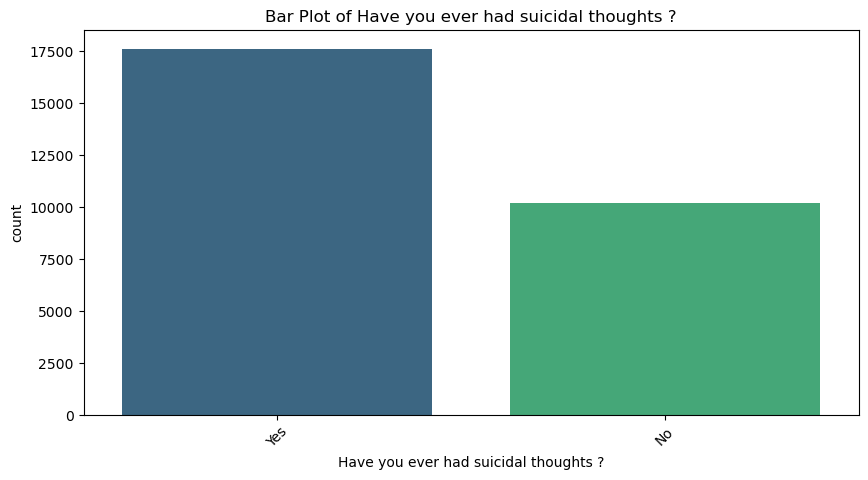

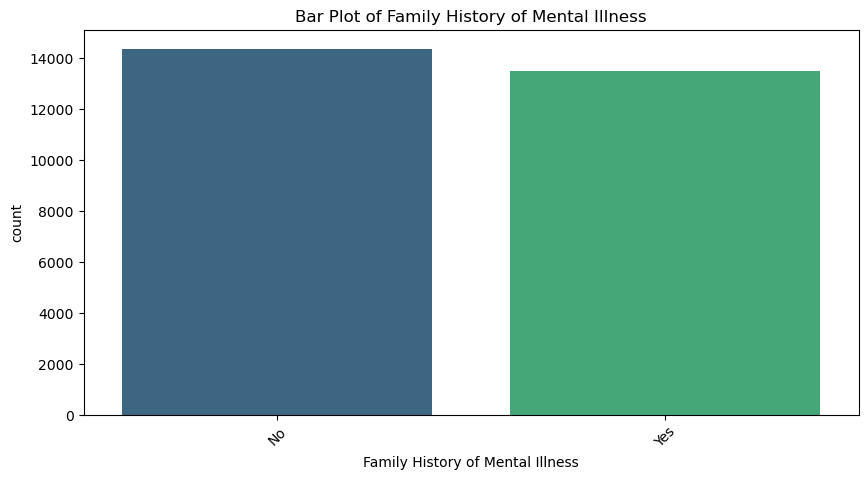

In [30]:
#Bar Plot for categorical column counts
for column in data_cleaned.select_dtypes(include=[object]).columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=data_cleaned[column], palette='viridis')
    plt.title(f'Bar Plot of {column}')
    plt.xticks(rotation=45)
    plt.show()

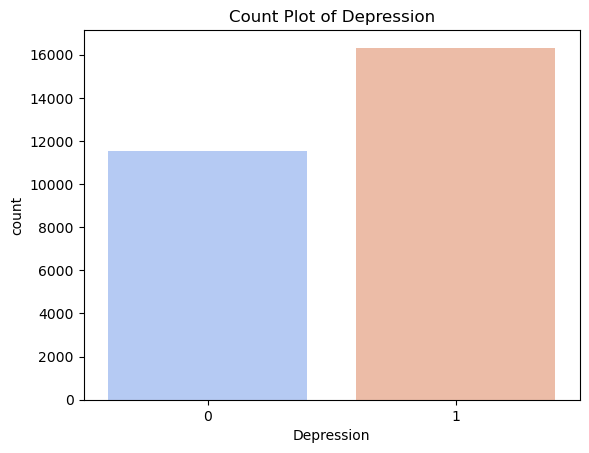

In [31]:
#Count Plot for specific target column
if 'Depression' in data_cleaned.columns:
    plt.figure()
    sns.countplot(x='Depression', data=data_cleaned, palette='coolwarm')
    plt.title('Count Plot of Depression')
    plt.show()


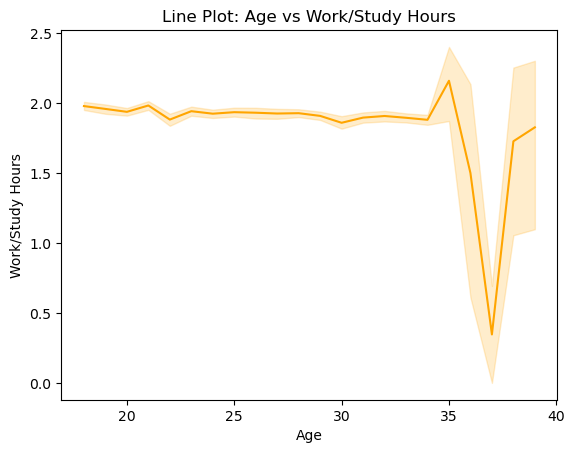

In [32]:
#Line Plot (Example with Age vs Work/Study Hours)
if 'Age' in data_cleaned.columns and 'Work/Study Hours' in data.columns:
    plt.figure()
    sns.lineplot(x='Age', y='Work/Study Hours', data=data_cleaned, color='orange')
    plt.title('Line Plot: Age vs Work/Study Hours')
    plt.show()

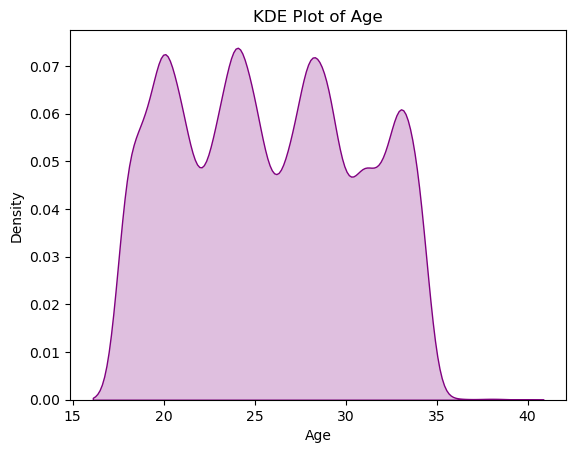

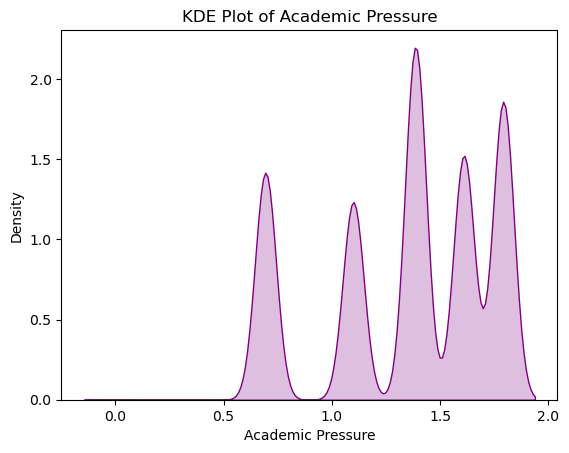

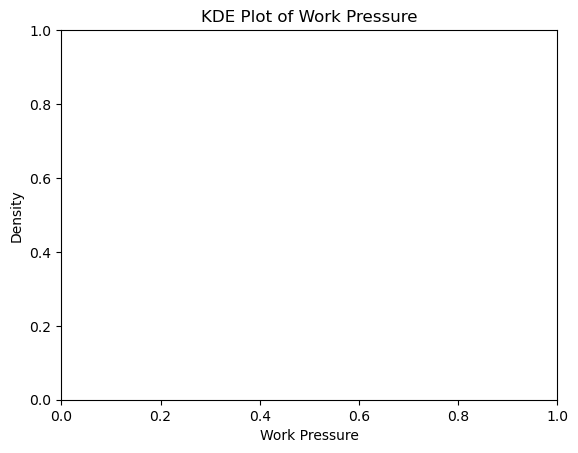

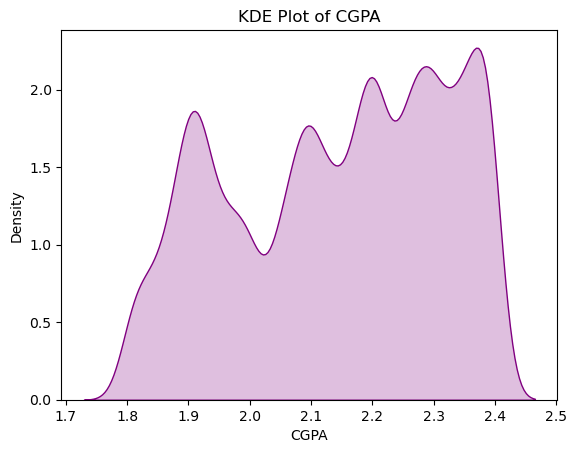

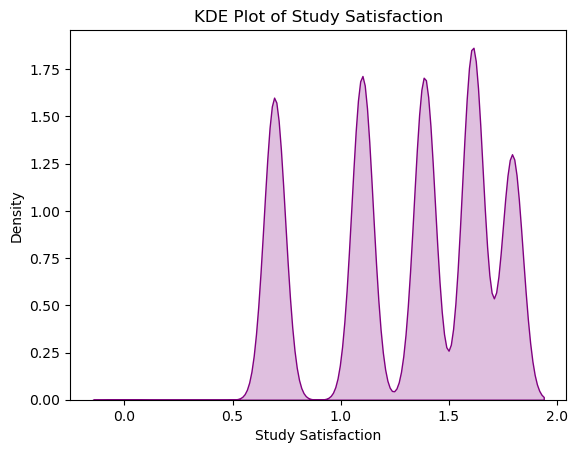

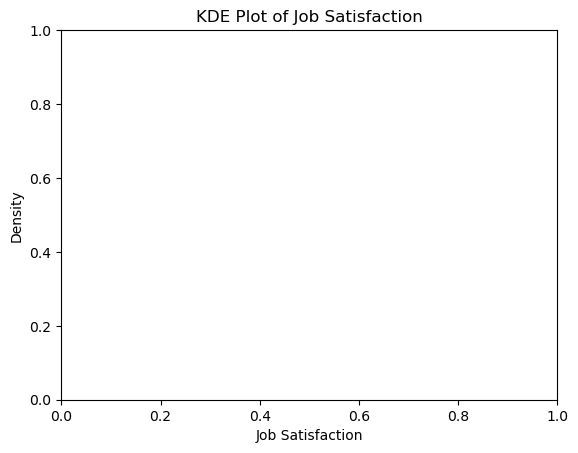

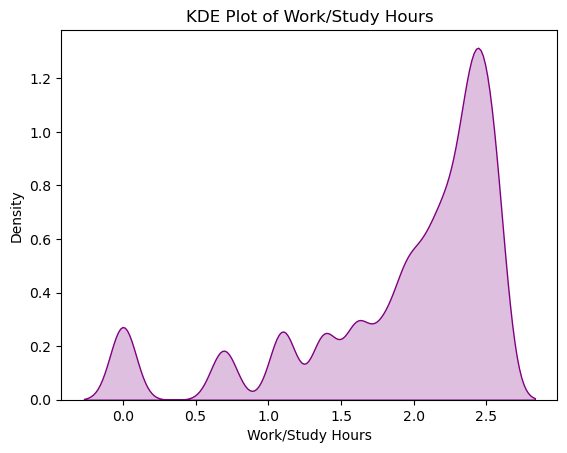

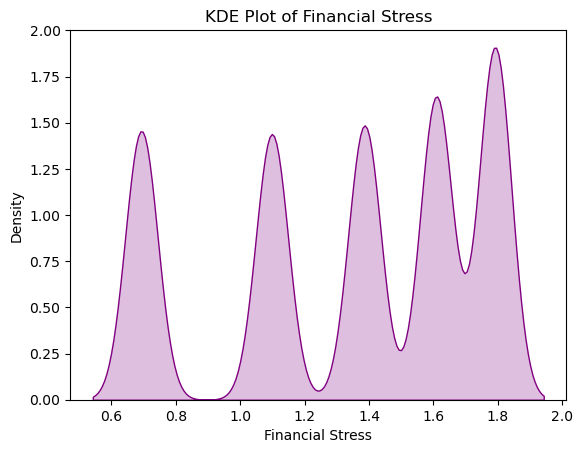

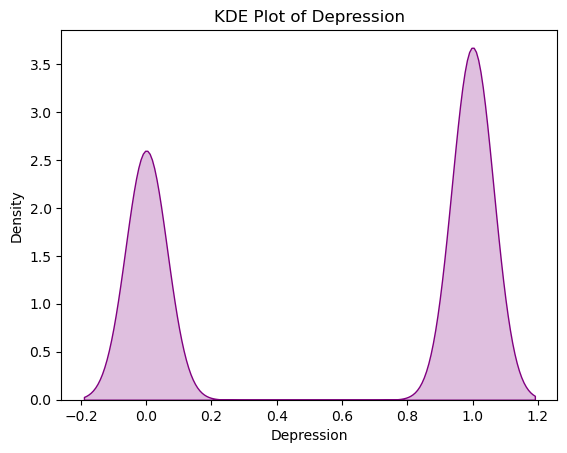

In [33]:
#KDE Plot for numeric columns
for column in numerical_columns.columns:
    plt.figure()
    sns.kdeplot(data_cleaned[column], shade=True, color='purple')
    plt.title(f'KDE Plot of {column}')
    plt.show()

7.Feature Engineering
---

In [34]:
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

In [35]:
categorical_columns

Index(['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object')

In [36]:
# One-Hot Encoding for categorical columns(no ordinal relationship)
data_onehot_encoded = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=True)

In [37]:
#An ordinal relationship is a type of data relationship where the order or ranking of the values matters. 
#It implies that the categories can be placed in a meaningful sequence, 
#but the exact differences between the categories are not necessarily uniform or known.

In [38]:
# Label Encoding for categorical columns (if ordinal relationship exists)
label_encoder = LabelEncoder()
for column in categorical_columns:
    # Applying label encoding for each column
    data_cleaned[column] = label_encoder.fit_transform(data_cleaned[column])

In [39]:
print("Data after One-Hot Encoding (if applied):\n", data_onehot_encoded.head())
print("\nData after Label Encoding (if applied):\n", data_cleaned.head())

Data after One-Hot Encoding (if applied):
     Age  Academic Pressure  Work Pressure      CGPA  Study Satisfaction  \
0  33.0           1.791759            0.0  2.299581            1.098612   
1  24.0           1.098612            0.0  1.931521            1.791759   
2  31.0           1.386294            0.0  2.083185            1.791759   
3  28.0           1.386294            0.0  1.885553            1.098612   
4  25.0           1.609438            0.0  2.211566            1.386294   

   Job Satisfaction  Work/Study Hours  Financial Stress  Depression  \
0               0.0          1.386294          0.693147           1   
1               0.0          1.386294          1.098612           0   
2               0.0          2.302585          0.693147           0   
3               0.0          1.609438          1.791759           1   
4               0.0          0.693147          0.693147           0   

   Gender_Male  ...  Degree_MBBS  Degree_MCA  Degree_MD  Degree_ME  \
0        

8.Feature Selection
---

In [48]:
#Random Forest Feature Selection
# Separate features and target
X = data_cleaned.drop(columns=['Depression'])  # Assuming 'Depression' is the target column
y = data_cleaned['Depression']
#spilit into training and testing sets
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [49]:
# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to visualize feature importance
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

                                  Feature  Importance
12  Have you ever had suicidal thoughts ?    0.226601
4                       Academic Pressure    0.161515
14                       Financial Stress    0.092343
6                                    CGPA    0.087451
1                                     Age    0.084717
2                                    City    0.072422
13                       Work/Study Hours    0.069248
11                                 Degree    0.061496
7                      Study Satisfaction    0.042915
10                         Dietary Habits    0.036261
9                          Sleep Duration    0.033436
15       Family History of Mental Illness    0.015658
0                                  Gender    0.015563
3                              Profession    0.000375
5                           Work Pressure    0.000000
8                        Job Satisfaction    0.000000


In [57]:
selector = SelectFromModel(rf, threshold=0.01)  # Select features above the mean importance
selector.fit(X_train, y_train)

# Transform data to keep selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Get the selected feature names
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness'],
      dtype='object')


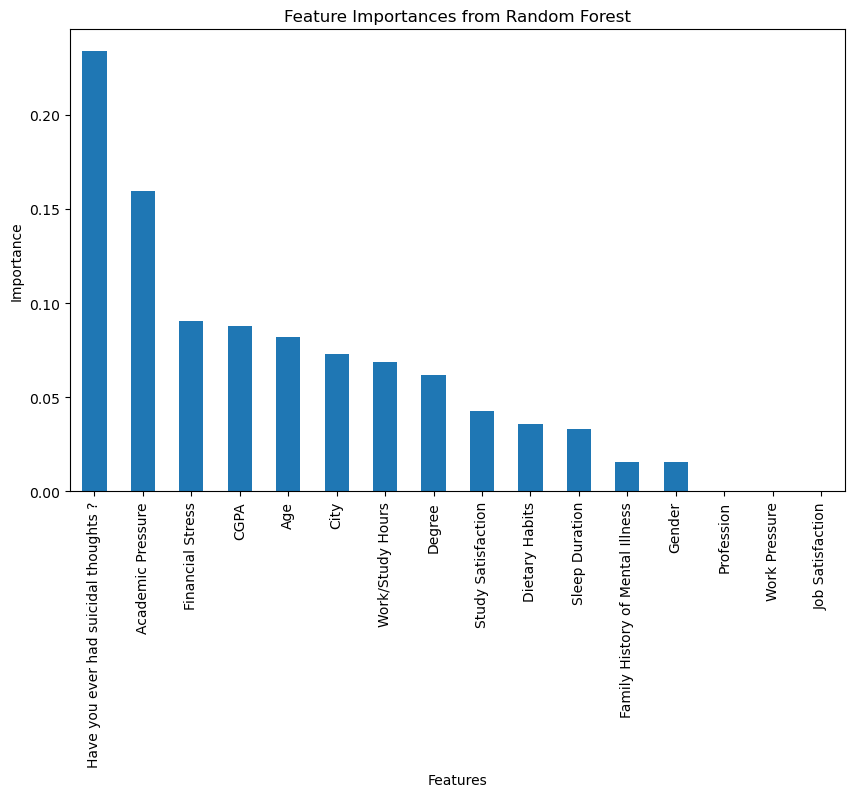

In [44]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='bar')
plt.title("Feature Importances from Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [45]:
# Get the most important features
important_features = sorted_importances.head(10)
print("\nTop 10 Important Features from Random Forest:")
print(important_features)


Top 10 Important Features from Random Forest:
Have you ever had suicidal thoughts ?    0.233719
Academic Pressure                        0.159707
Financial Stress                         0.090597
CGPA                                     0.087570
Age                                      0.082194
City                                     0.072712
Work/Study Hours                         0.068525
Degree                                   0.061802
Study Satisfaction                       0.042498
Dietary Habits                           0.035796
dtype: float64


In [58]:
X_train_selected

array([[ 0.        , 25.        , 50.        , ...,  2.30258509,
         1.09861229,  1.        ],
       [ 1.        , 33.        , 38.        , ...,  2.56494936,
         1.60943791,  0.        ],
       [ 0.        , 31.        ,  5.        , ...,  1.60943791,
         1.79175947,  1.        ],
       ...,
       [ 1.        , 19.        , 21.        , ...,  1.60943791,
         1.38629436,  0.        ],
       [ 1.        , 24.        ,  1.        , ...,  2.56494936,
         1.79175947,  0.        ],
       [ 1.        , 30.        , 14.        , ...,  2.39789527,
         0.69314718,  1.        ]])

In [46]:
#Select K Best Features
# Using SelectKBest to select top 'k' features based on ANOVA F-value (f_classif)
kbest = SelectKBest(score_func=f_classif, k=10)
X_new = kbest.fit_transform(X, y)

In [47]:
# Get the selected features
selected_features = pd.DataFrame(X_new, columns=X.columns[kbest.get_support()])
print("\nTop 10 Features selected by SelectKBest:")
print(selected_features.columns)


Top 10 Features selected by SelectKBest:
Index(['Age', 'City', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
       'Dietary Habits', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness'],
      dtype='object')
